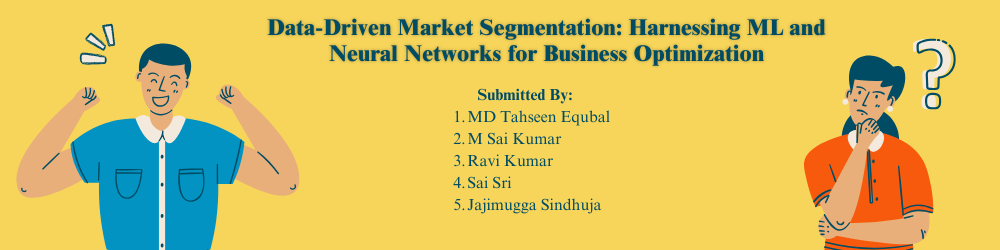

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore") 

# Loading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\91771\Desktop\Innomatic\MarketSegmentation-main\Credit_Customer_Data.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,C13393,1647.461444,1.000000,323.55,323.55,0.00,0.000000,0.750000,0.750000,0.000000,0.000000,0,9,5000.0,669.943854,607.902881,0.000000,12
49996,C13270,1406.388339,1.000000,542.70,542.70,0.00,305.496366,0.333333,0.333333,0.000000,0.166667,2,8,1600.0,505.060863,451.453969,0.000000,12
49997,C15062,129.836526,0.909091,1433.99,743.99,690.00,0.000000,0.909091,0.454545,0.636364,0.000000,0,19,4000.0,1363.134203,141.648860,0.875000,11
49998,C14458,1193.682005,1.000000,445.18,445.18,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,11,1200.0,673.563611,775.381032,0.000000,11


# EDA

In [3]:
df.shape

(50000, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           50000 non-null  object 
 1   BALANCE                           50000 non-null  float64
 2   BALANCE_FREQUENCY                 50000 non-null  float64
 3   PURCHASES                         50000 non-null  float64
 4   ONEOFF_PURCHASES                  50000 non-null  float64
 5   INSTALLMENTS_PURCHASES            50000 non-null  float64
 6   CASH_ADVANCE                      50000 non-null  float64
 7   PURCHASES_FREQUENCY               50000 non-null  float64
 8   ONEOFF_PURCHASES_FREQUENCY        50000 non-null  float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  50000 non-null  float64
 10  CASH_ADVANCE_FREQUENCY            50000 non-null  float64
 11  CASH_ADVANCE_TRX                  50000 non-null  int64  
 12  PURC

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0000,49995.000000,50000.000000,48293.000000,50000.000000,50000.000000
mean,1565.618389,0.877165,1006.782440,592.839470,414.229745,992.233716,0.492632,0.204235,0.365793,0.135274,3.275520,14.8763,4499.769385,1753.169784,879.938765,0.154453,11.515320
std,2082.252473,0.236357,2097.536781,1620.214857,914.648733,2130.375399,0.401844,0.299331,0.397781,0.199809,6.897785,25.1138,3644.512444,2932.934741,2456.321003,0.292137,1.340732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,130.530488,0.875000,40.097500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.0000,1500.000000,382.866599,168.730445,0.000000,12.000000
50%,870.783501,1.000000,366.660000,40.000000,90.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.0000,3000.000000,859.829946,311.637186,0.000000,12.000000
75%,2046.727519,1.000000,1124.880000,586.550000,469.920000,1113.273292,0.916667,0.333333,0.750000,0.222222,4.000000,17.0000,6500.000000,1913.827405,833.953708,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.0000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
df.isnull().sum()

CUST_ID                                0
BALANCE                                0
BALANCE_FREQUENCY                      0
PURCHASES                              0
ONEOFF_PURCHASES                       0
INSTALLMENTS_PURCHASES                 0
CASH_ADVANCE                           0
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY             0
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY                 0
CASH_ADVANCE_TRX                       0
PURCHASES_TRX                          0
CREDIT_LIMIT                           5
PAYMENTS                               0
MINIMUM_PAYMENTS                    1707
PRC_FULL_PAYMENT                       0
TENURE                                 0
dtype: int64

In [7]:
# filling mean value in place of missing values in the dataset
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())

In [8]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
# checking for duplicate rows in the dataset
df.duplicated().sum()

41050

In [10]:
# drop CUST_ID column because it is not used
df.drop(columns=["CUST_ID"],axis=1,inplace=True)

In [11]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

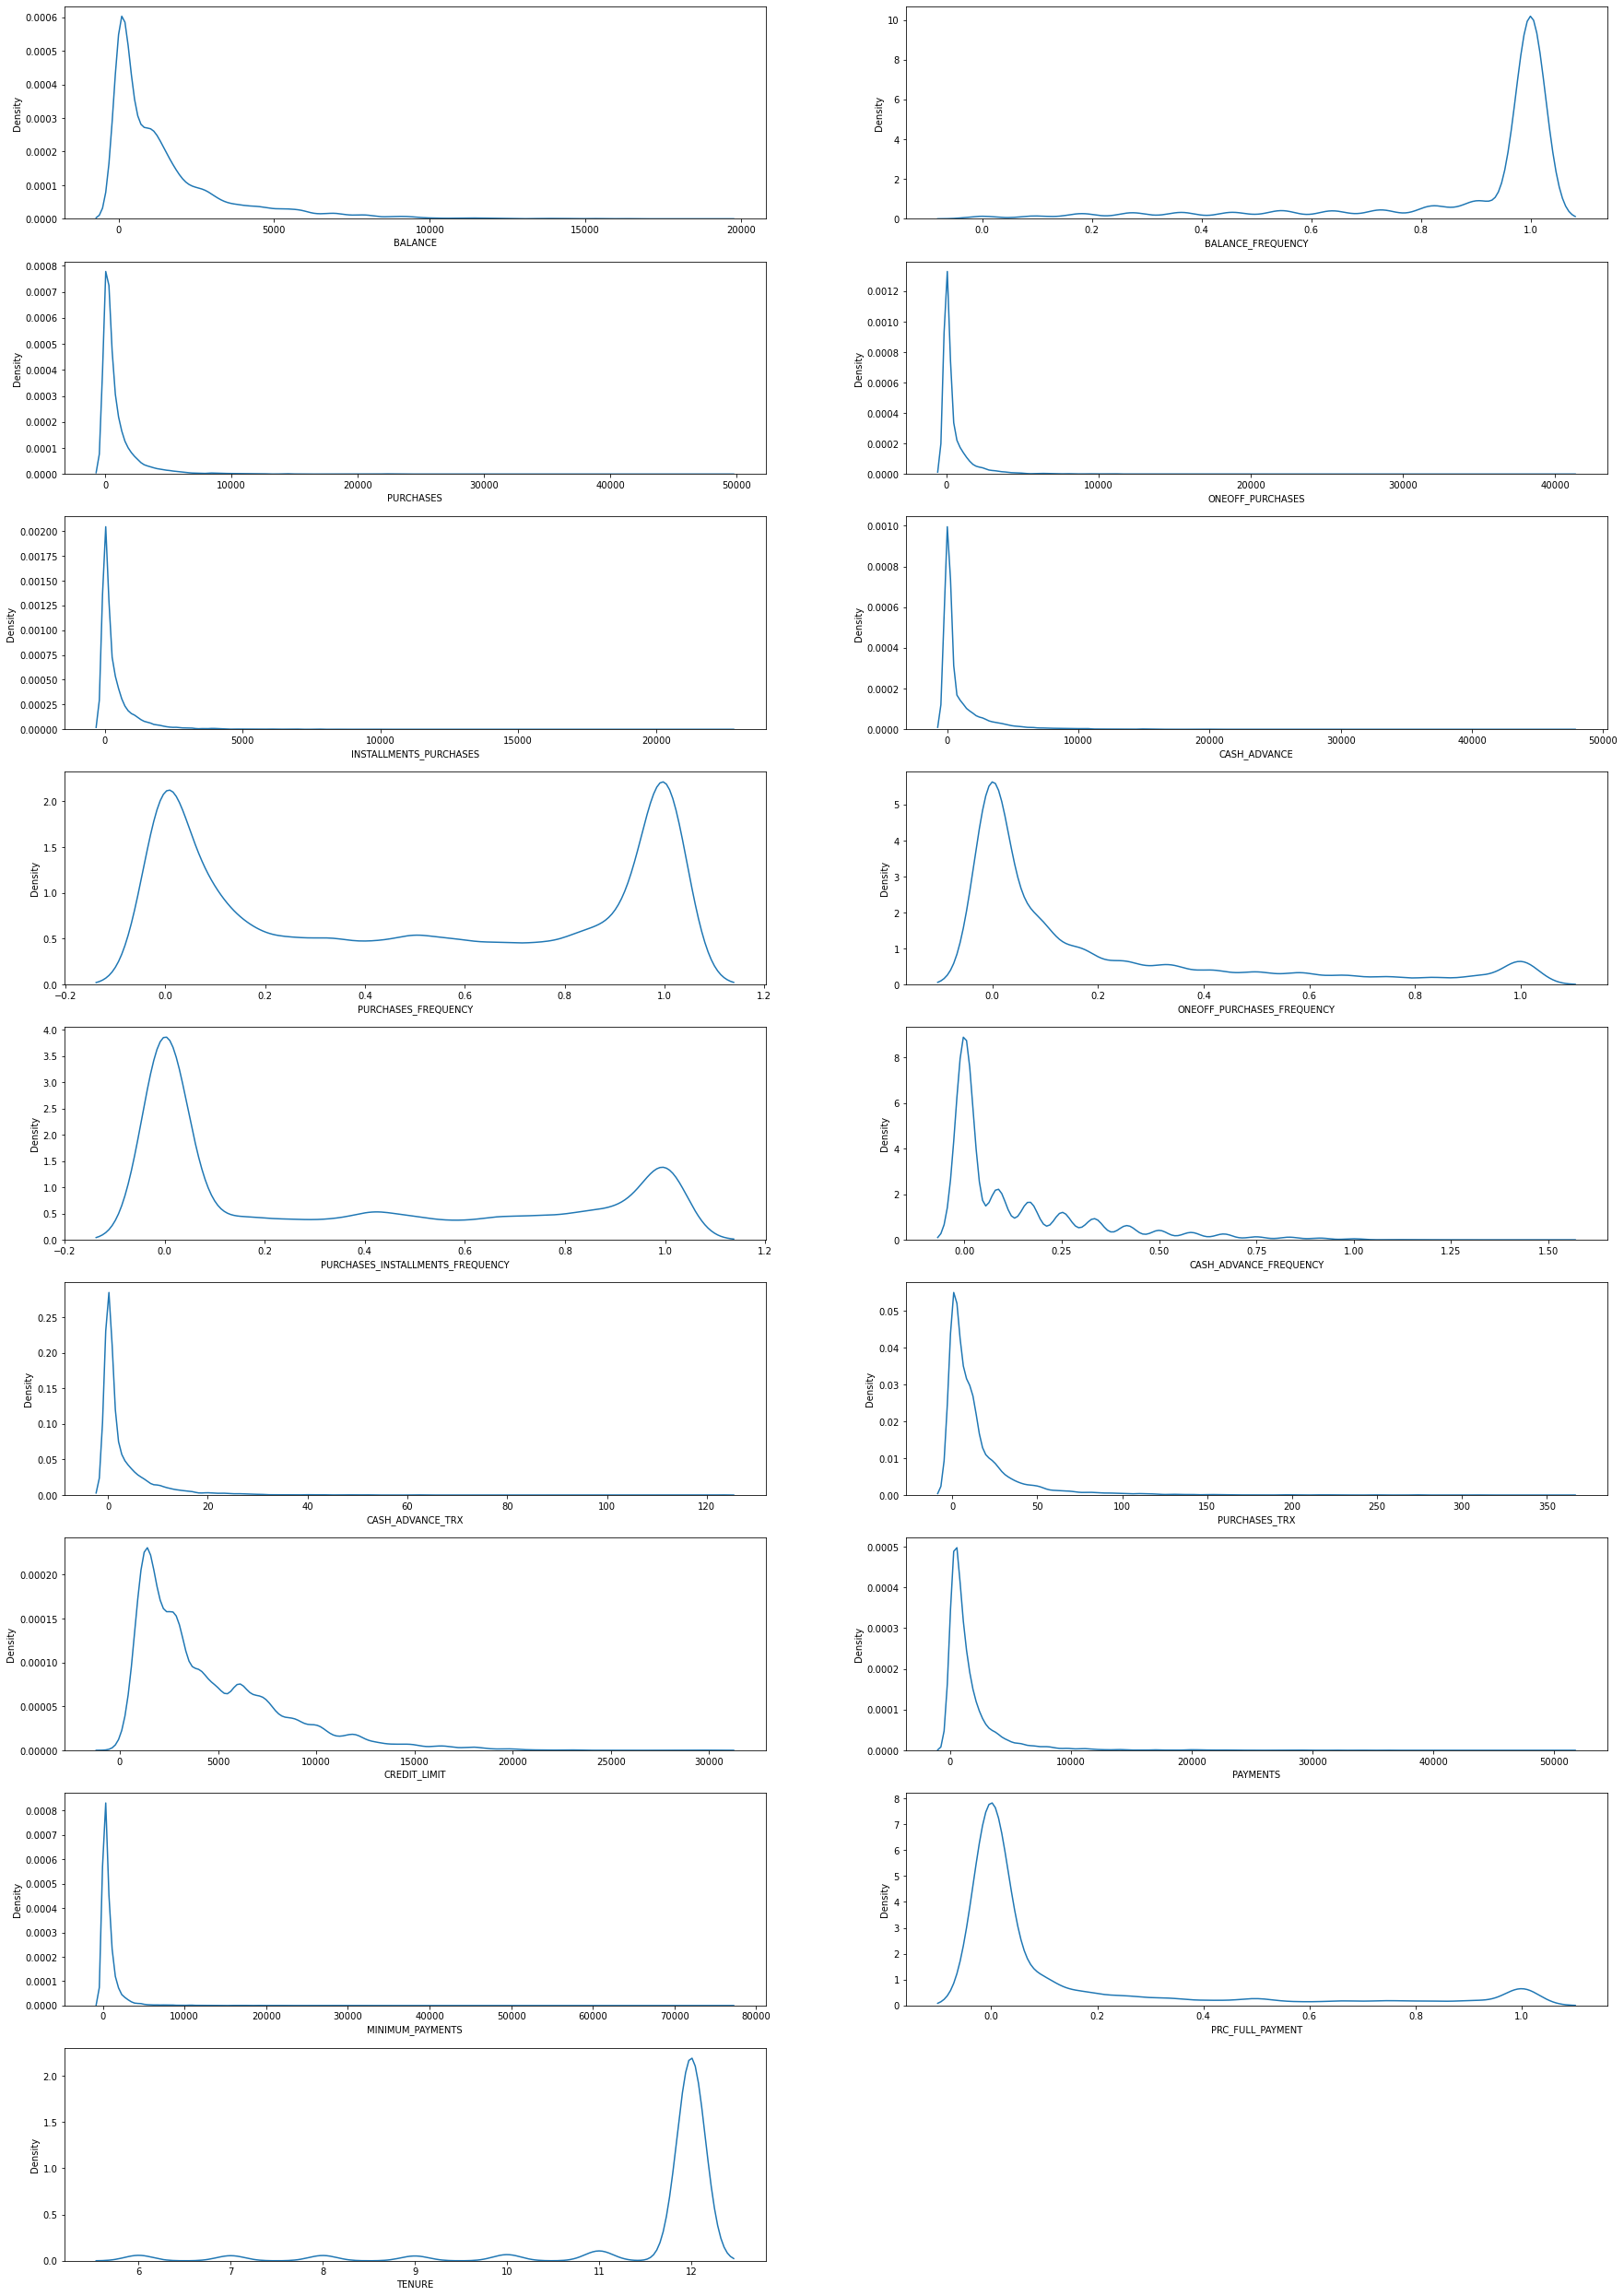

In [12]:
plt.figure(figsize=(30,45))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

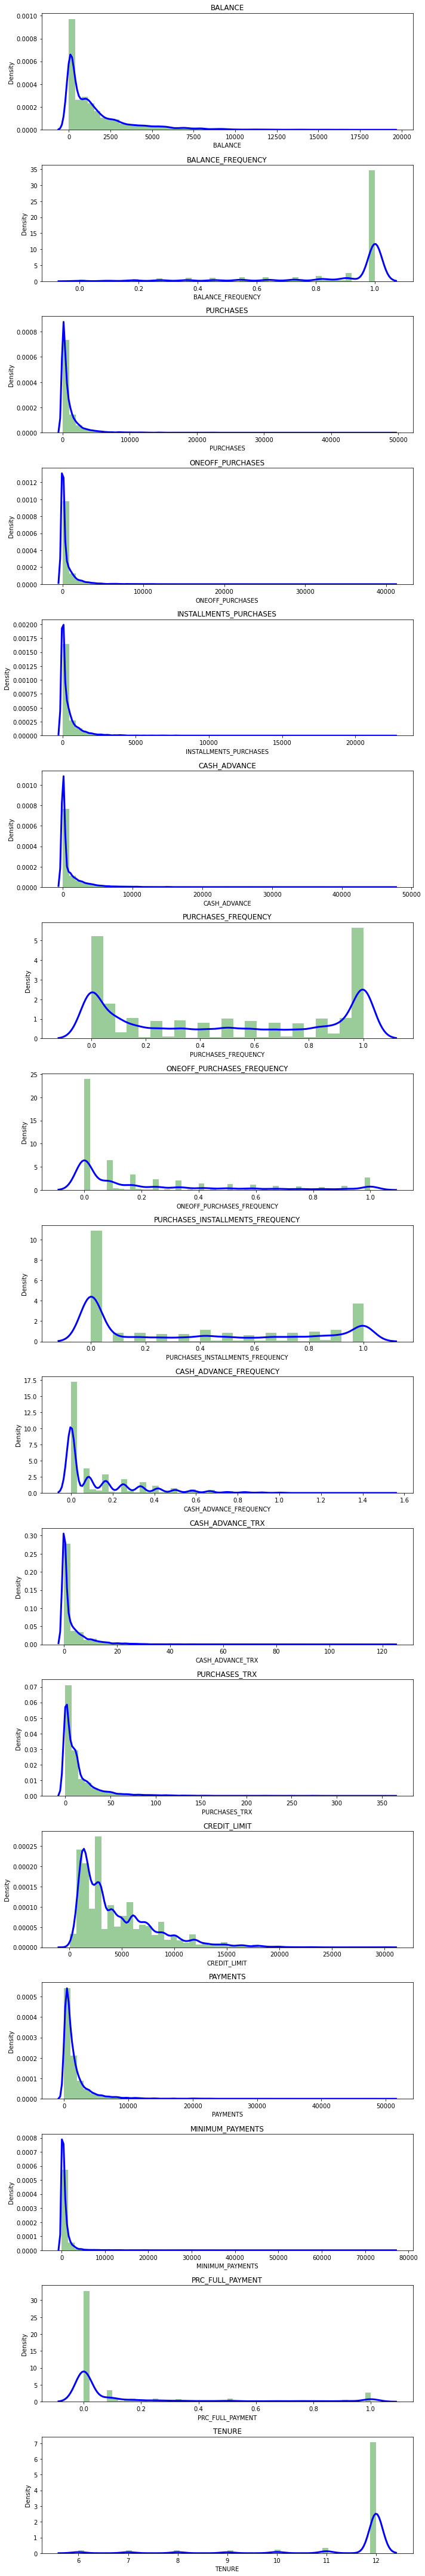

In [13]:
plt.figure(figsize=(10,60))
for i in range(0,17):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]],kde_kws={'color':'b','bw': 0.1,'lw':3,'label':'KDE'},hist_kws={'color':'g'})
    plt.title(df.columns[i])
plt.tight_layout()

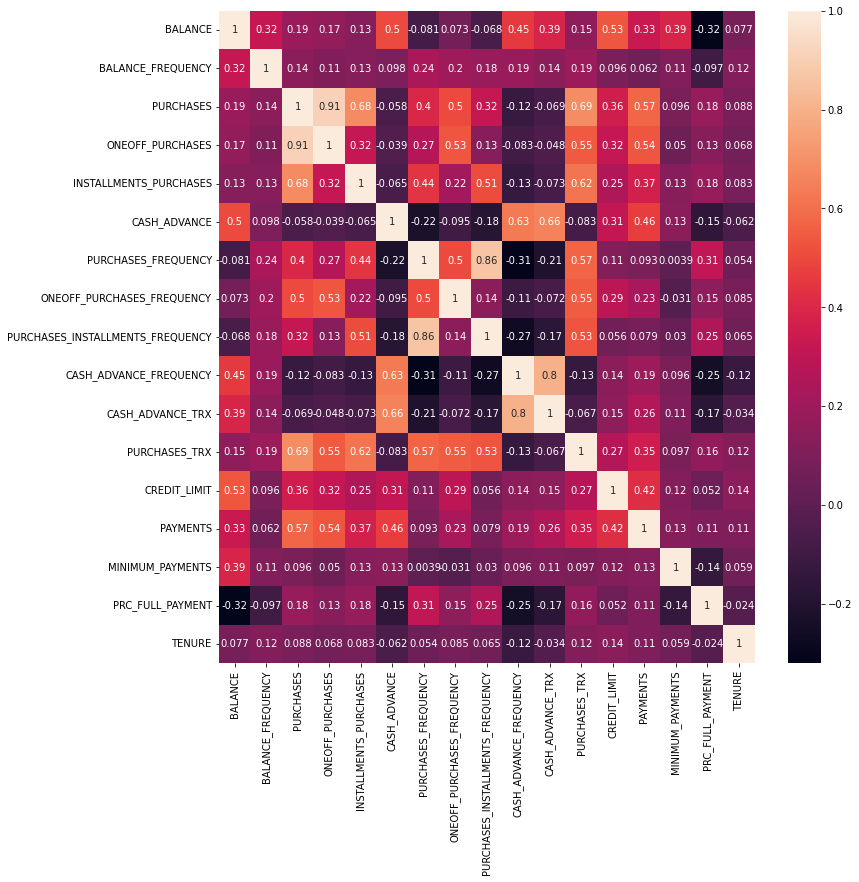

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Section 2 Feature Engineering

## Scaling the DataFrame

In [21]:
scaled_df = scalar.fit_transform(df)

## Dimensionality reduction
Converting the DataFrame into 2D DataFrame for visualization

In [22]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-1.682293,-1.092352
1,-1.198989,2.474497
2,0.982766,-0.371811
3,-0.873899,0.037847
4,-1.600839,-0.705062
...,...,...
49995,0.120103,-0.597193
49996,-0.880789,-0.122717
49997,1.322025,-1.858258
49998,0.358392,-1.055409


# Hyperparameter tuning
### Finding 'k' value by Elbow Method

In [25]:
# inertia = []
# range_val = range(1,15)
# for i in range_val:
#     kmean = KMeans(n_clusters=i)
#     kmean.fit_predict(pd.DataFrame(scaled_df))
#     inertia.append(kmean.inertia_)
# plt.plot(range_val,inertia,'bx-')
# plt.xlabel('Values of K') 
# plt.ylabel('Inertia') 
# plt.title('The Elbow Method using Inertia') 
# plt.show()

### Finding K value using Silhouette Score ( Another Approach)

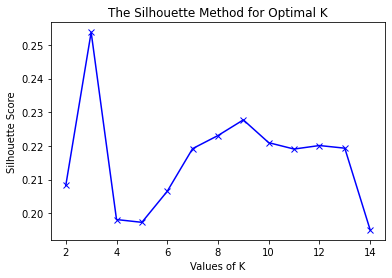

In [24]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

silhouette_scores = []
range_val = range(2, 15)  # Start from 2 because silhouette score isn't defined for 1 cluster

for i in range_val:
    kmean = KMeans(n_clusters=i, random_state=42)
    labels = kmean.fit_predict(pd.DataFrame(scaled_df))
    score = silhouette_score(scaled_df, labels)
    silhouette_scores.append(score)

plt.plot(range_val, silhouette_scores, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Method for Optimal K')
plt.show()


# Model Building using KMeans

In [26]:
kmeans_model=KMeans(3)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

# Visualizing the clustered dataframe

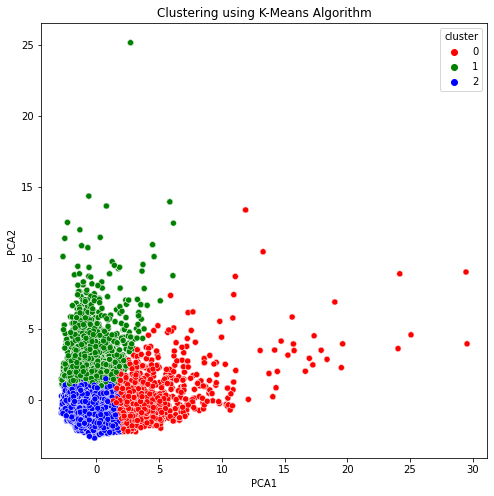

In [27]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [28]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
# inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2215.580336,0.981384,4290.518471,2715.878724,1574.901908,445.015644,0.949038,0.671854,0.744778,0.063546,1.523740,57.311535,7758.411011,4163.611398,1230.595210,0.300099,11.918002
1,4046.776833,0.957687,393.928477,256.910611,137.099146,4007.453473,0.233137,0.112534,0.144202,0.450177,12.668697,5.784992,6793.738639,3151.884334,1840.103893,0.035646,11.373133
2,808.947865,0.836033,506.867350,254.388767,252.822200,339.316574,0.467204,0.134164,0.346224,0.069992,1.250900,8.712041,3270.216822,919.012426,567.352680,0.155436,11.470957


In [29]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,879.938765,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1647.461444,1.000000,323.55,323.55,0.00,0.000000,0.750000,0.750000,0.000000,0.000000,0,9,5000.0,669.943854,607.902881,0.000000,12,2
49996,1406.388339,1.000000,542.70,542.70,0.00,305.496366,0.333333,0.333333,0.000000,0.166667,2,8,1600.0,505.060863,451.453969,0.000000,12,2
49997,129.836526,0.909091,1433.99,743.99,690.00,0.000000,0.909091,0.454545,0.636364,0.000000,0,19,4000.0,1363.134203,141.648860,0.875000,11,2
49998,1193.682005,1.000000,445.18,445.18,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,11,1200.0,673.563611,775.381032,0.000000,11,2


In [30]:
cluster_1_df = cluster_df[cluster_df["Cluster"]==0]
cluster_1_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.00,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,0
12,1516.928620,1.000000,3217.99,2500.23,717.76,0.000000,1.00,0.250000,0.916667,0.000000,0,26,3000.0,608.263689,490.207013,0.250000,12,0
21,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.00,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.000000,12,0
34,3517.101616,0.727273,547.28,0.00,547.28,0.000000,1.00,0.000000,1.000000,0.000000,0,14,11000.0,8735.607835,17862.558310,0.000000,12,0
37,4047.480828,1.000000,2380.55,1642.17,738.38,1697.660901,0.75,0.500000,0.750000,0.333333,7,41,5000.0,1617.894416,1541.141605,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49967,2072.457624,1.000000,17409.21,11263.17,6146.04,0.000000,1.00,1.000000,1.000000,0.000000,0,175,19500.0,19517.161600,517.324081,0.333333,12,0
49971,3061.213971,1.000000,1829.20,1792.70,36.50,0.000000,1.00,1.000000,0.083333,0.000000,0,17,7000.0,971.234118,985.954762,0.000000,12,0
49978,2928.480007,1.000000,5747.76,4021.77,1725.99,0.000000,1.00,0.583333,1.000000,0.000000,0,81,8000.0,4901.164291,788.689176,0.000000,12,0
49989,581.916416,1.000000,5723.90,3780.51,1943.39,0.000000,1.00,1.000000,1.000000,0.000000,0,130,7500.0,5666.333186,186.941527,1.000000,12,0


In [31]:
cluster_2_df = cluster_df[cluster_df["Cluster"]==1]
cluster_2_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
15,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12,1
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,1
24,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.000000,0.000000,0.000000,0.363636,4,0,6000.0,1422.726707,1657.002877,0.000000,11,1
28,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49961,7422.444145,1.000000,148.29,148.29,0.00,9313.095186,0.083333,0.083333,0.000000,0.416667,17,2,9000.0,2299.218749,2988.430055,0.000000,12,1
49973,2893.897487,1.000000,18.00,0.00,18.00,3904.514452,0.083333,0.000000,0.083333,0.416667,23,1,6000.0,483.729934,720.971058,0.000000,12,1
49983,6671.450524,1.000000,369.52,369.52,0.00,2578.596448,0.583333,0.583333,0.000000,0.250000,7,7,7500.0,1303.259619,3772.048542,0.000000,12,1
49984,428.532479,1.000000,0.00,0.00,0.00,2039.234459,0.000000,0.000000,0.000000,0.833333,44,0,9000.0,1446.932048,177.961350,0.000000,12,1


In [32]:
cluster_3_df = cluster_df[cluster_df["Cluster"]==2]
cluster_3_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,879.938765,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1647.461444,1.000000,323.55,323.55,0.00,0.000000,0.750000,0.750000,0.000000,0.000000,0,9,5000.0,669.943854,607.902881,0.000000,12,2
49996,1406.388339,1.000000,542.70,542.70,0.00,305.496366,0.333333,0.333333,0.000000,0.166667,2,8,1600.0,505.060863,451.453969,0.000000,12,2
49997,129.836526,0.909091,1433.99,743.99,690.00,0.000000,0.909091,0.454545,0.636364,0.000000,0,19,4000.0,1363.134203,141.648860,0.875000,11,2
49998,1193.682005,1.000000,445.18,445.18,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,11,1200.0,673.563611,775.381032,0.000000,11,2


<AxesSubplot:xlabel='Cluster', ylabel='count'>

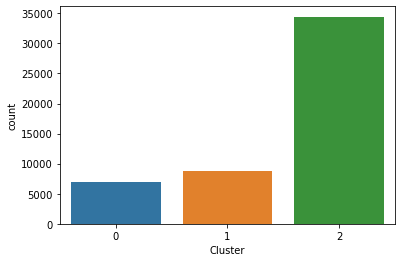

In [33]:
#Visualization
sns.countplot(x='Cluster', data=cluster_df)


## Statistical Analysis ( Anova Test)

In [34]:
import pandas as pd
from scipy.stats import f_oneway

# Load the dataset

data = cluster_df

# Identify continuous columns (excluding the 'Cluster' column)
continuous_columns = data.select_dtypes(include=['float64', 'int64']).columns
continuous_columns = [col for col in continuous_columns if col != 'Cluster']

# Perform ANOVA for each continuous column across clusters
anova_results = {}

for col in continuous_columns:
    # Group data by 'Cluster' and extract values for ANOVA
    groups = [group[col].values for name, group in data.groupby('Cluster')]
    
    # Perform one-way ANOVA
    f_stat, p_value = f_oneway(*groups)
    
    # Store the results
    anova_results[col] = (f_stat, p_value)

# Display results
for col, (f_stat, p_value) in anova_results.items():
    print(f"Column: {col}")
    print(f"  F-statistic: {f_stat:.4f}")
    print(f"  P-value: {p_value:.4g}")
    if p_value < 0.05:
        print("  Result: Statistically significant difference between groups")
    else:
        print("  Result: No statistically significant difference between groups")
    print()


Column: BALANCE
  F-statistic: 13546.2555
  P-value: 0
  Result: Statistically significant difference between groups

Column: BALANCE_FREQUENCY
  F-statistic: 1817.7030
  P-value: 0
  Result: Statistically significant difference between groups

Column: PURCHASES
  F-statistic: 16006.0741
  P-value: 0
  Result: Statistically significant difference between groups

Column: ONEOFF_PURCHASES
  F-statistic: 9397.5773
  P-value: 0
  Result: Statistically significant difference between groups

Column: INSTALLMENTS_PURCHASES
  F-statistic: 8709.5991
  P-value: 0
  Result: Statistically significant difference between groups

Column: CASH_ADVANCE
  F-statistic: 18280.6685
  P-value: 0
  Result: Statistically significant difference between groups

Column: PURCHASES_FREQUENCY
  F-statistic: 8448.0923
  P-value: 0
  Result: Statistically significant difference between groups

Column: ONEOFF_PURCHASES_FREQUENCY
  F-statistic: 15958.4270
  P-value: 0
  Result: Statistically significant difference betw

### Anova Insight :

- **P-Value**: All p-values are 0, meaning the differences between clusters are statistically significant.
- **F-Statistic**: High values indicate strong differences between cluster means for each variable.
- **Conclusion**: Each cluster shows distinct customer behaviors (e.g., balances, purchases). This confirms meaningful segmentation and can guide targeted actions.

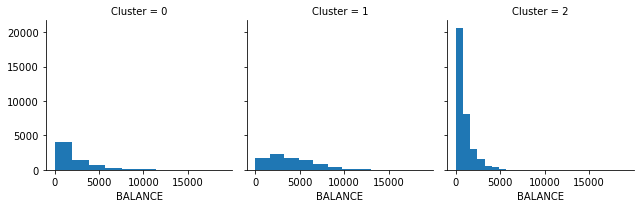

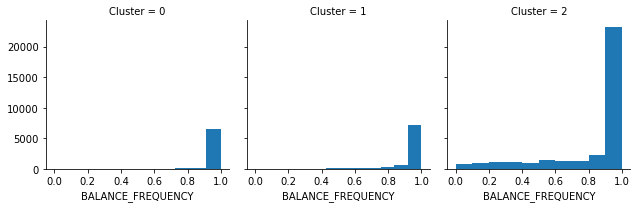

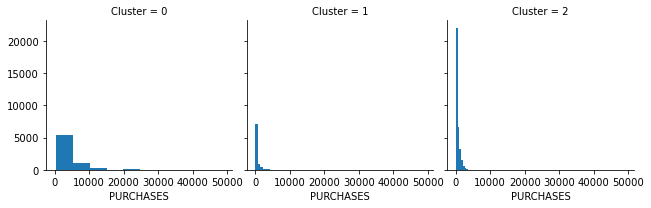

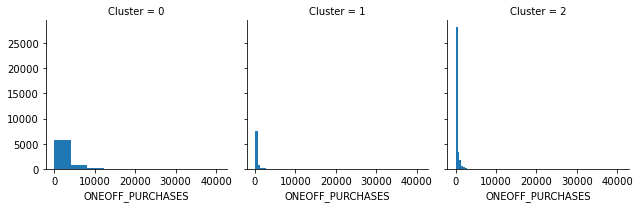

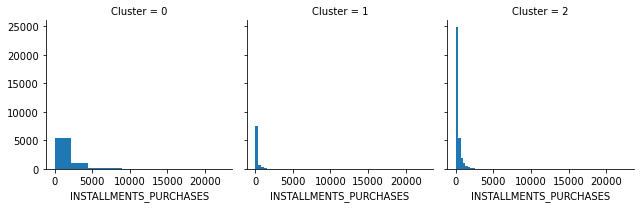

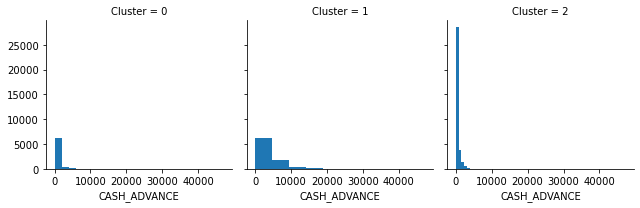

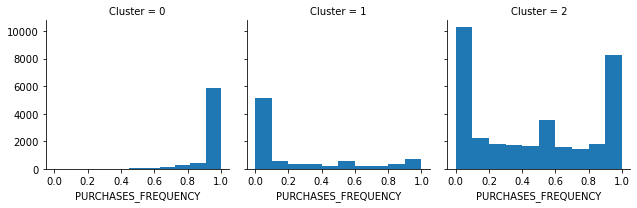

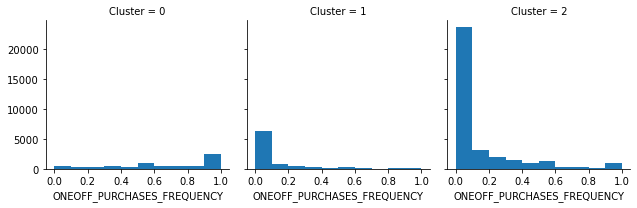

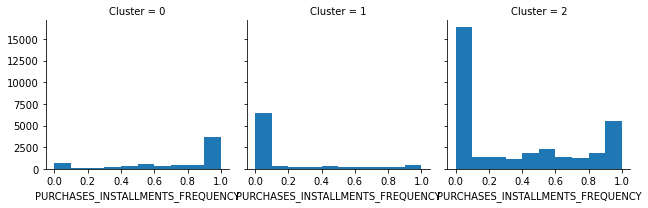

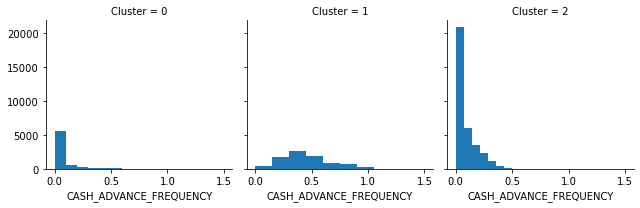

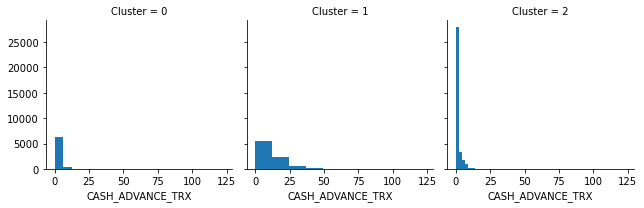

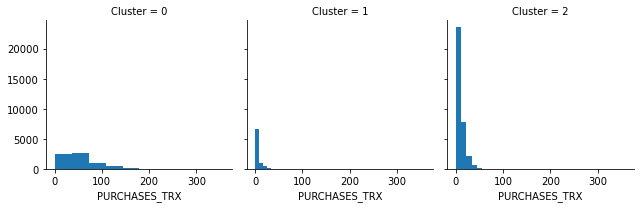

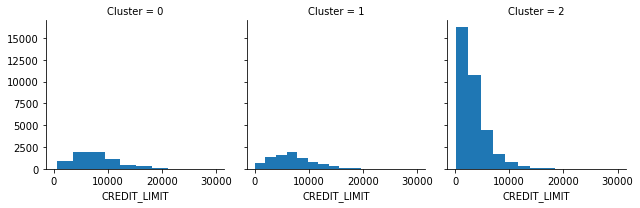

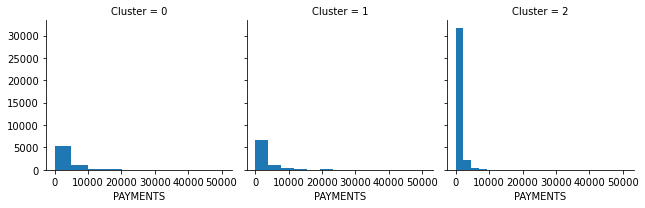

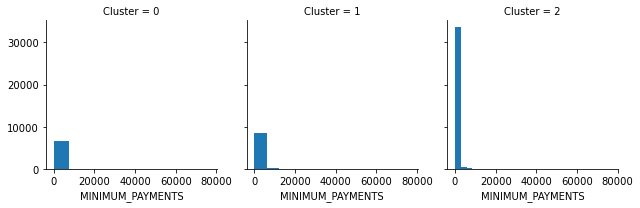

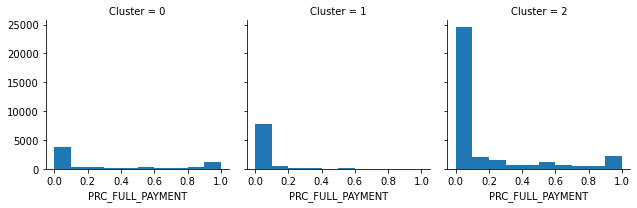

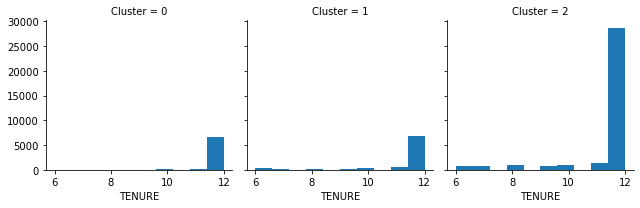

In [35]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Cluster')
    grid= grid.map(plt.hist, c)
plt.show()

## Saving the kmeans clustering model and the data with cluster label

In [36]:
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [37]:
cluster_df.to_csv("Clustered_Customer_Data.csv")

# Section 3: Data Prepocessing

## Check And Correct Imbalanced Data Set Using (SMOTE Techniques)

In [38]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt


In [39]:
# Assuming 'cluster_df' is already loaded
# Separate features and target
X = cluster_df.drop(['Cluster'], axis=1)
y = cluster_df['Cluster']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

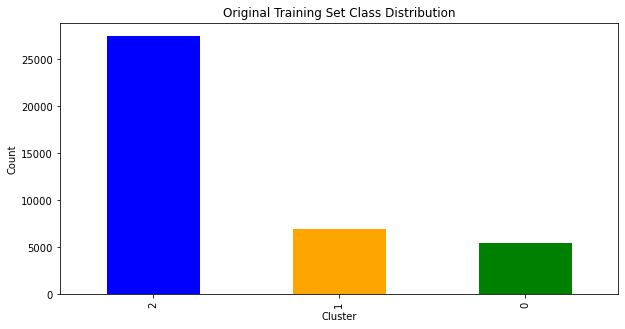

In [40]:
# Visualize original distribution
plt.figure(figsize=(10, 5))
y_train.value_counts().plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title("Original Training Set Class Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

## Training and Testing the Model

In [41]:

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

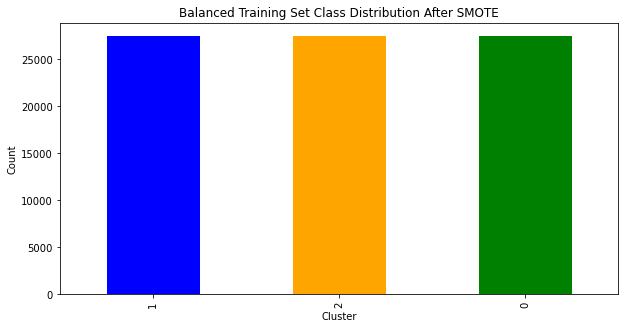

In [42]:
# Visualize balanced distribution
plt.figure(figsize=(10, 5))
y_train_balanced.value_counts().plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title("Balanced Training Set Class Distribution After SMOTE")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

In [43]:
# #Split Dataset
# X = cluster_df.drop(['Cluster'],axis=1)
# y= cluster_df[['Cluster']]
# X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)


In [44]:
X_train_balanced

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4504.793340,1.000000,0.00,0.00,0.00,4707.988554,0.000000,0.000000,0.000000,1.000000,34,0,7500.0,1786.385347,1086.360075,0.000000,12
1,1029.101022,1.000000,49.10,0.00,49.10,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,1000.0,59.924534,8269.955787,0.000000,12
2,231.859622,0.888889,190.00,190.00,0.00,108.768879,0.111111,0.111111,0.000000,0.111111,2,1,1200.0,119.940752,128.955873,0.000000,9
3,9266.080540,1.000000,100.00,0.00,100.00,4383.296268,0.333333,0.000000,0.250000,0.166667,3,4,17500.0,2444.123547,2603.406476,0.000000,12
4,61.588389,0.818182,250.00,39.00,211.00,0.000000,0.666667,0.083333,0.666667,0.000000,0,12,1000.0,282.556704,149.753219,0.111111,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82531,1775.884148,1.000000,0.00,0.00,0.00,2444.627773,0.000000,0.000000,0.000000,0.333333,14,0,2500.0,399.862600,646.089964,0.000000,12
82532,5308.906350,1.000000,0.00,0.00,0.00,4954.608429,0.000000,0.000000,0.000000,0.500000,21,0,9500.0,1334.749456,1272.080547,0.000000,12
82533,2594.878719,1.000000,160.00,160.00,0.00,3095.180130,0.083333,0.083333,0.000000,0.250000,7,3,9500.0,851.529670,596.332001,0.000000,12
82534,4241.864828,1.000000,225.08,225.08,0.00,2842.771908,0.090909,0.090909,0.000000,1.000000,17,2,5000.0,2011.126751,1282.428401,0.000000,11


In [45]:
X_test

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
33553,162.948350,0.545455,400.00,400.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,4000.0,137.205730,71.377094,0.000000,12
9427,41.301246,1.000000,655.79,655.79,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,13,6000.0,685.985441,185.521414,1.000000,12
199,5698.539876,1.000000,47.55,0.00,47.55,2039.528040,0.166667,0.000000,0.166667,0.750000,14,2,6000.0,2976.579866,3463.174962,0.000000,12
12447,916.487817,1.000000,633.71,316.82,316.89,0.000000,1.000000,0.416667,0.750000,0.000000,0,20,4000.0,255.469805,234.095576,0.000000,12
39489,681.615445,1.000000,4117.24,290.00,3827.24,0.000000,1.000000,0.166667,1.000000,0.000000,0,229,6000.0,4561.589382,199.730537,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28567,409.592245,1.000000,190.00,190.00,0.00,1986.427611,0.166667,0.166667,0.000000,0.333333,6,2,11500.0,299.915950,173.798807,0.000000,12
25079,1859.165344,1.000000,0.00,0.00,0.00,1543.160715,0.000000,0.000000,0.000000,0.083333,5,0,3500.0,310.775643,659.586136,0.000000,12
18707,153.643158,1.000000,0.00,0.00,0.00,254.910338,0.000000,0.000000,0.000000,0.083333,1,0,300.0,347.227774,148.874410,0.083333,12
15200,631.959341,1.000000,0.00,0.00,0.00,19.388248,0.000000,0.000000,0.000000,0.083333,1,0,700.0,161.443162,328.060694,0.000000,12


# Section: 4 Model Selection 
-- Decision Tree
-- Random Forest
-- Xgboost


# Section 5: Model Training

### 1. Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Decision Tree Model
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train_balanced, y_train_balanced)
y_pred = model.predict(X_test)

# Confusion Matrix, Classification Report, and Testing Accuracy
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred))
print("Decision Tree Testing Accuracy:", accuracy_score(y_test, y_pred))


Decision Tree Confusion Matrix:
 [[1368    1    0]
 [   0 1712    2]
 [   5    1 6911]]

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1369
           1       1.00      1.00      1.00      1714
           2       1.00      1.00      1.00      6917

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

Decision Tree Testing Accuracy: 0.9991


### 2. Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Random Forest Model
rf_model = RandomForestClassifier(criterion="entropy", random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)
y_pred_rf = rf_model.predict(X_test)

# Confusion Matrix, Classification Report, and Accuracy
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Testing Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Confusion Matrix:
 [[1369    0    0]
 [   0 1714    0]
 [   5    1 6911]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1369
           1       1.00      1.00      1.00      1714
           2       1.00      1.00      1.00      6917

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

Random Forest Testing Accuracy: 0.9994


### 3. XGBoost 

In [48]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgb_model.fit(X_train_balanced, y_train_balanced)
y_pred_xgb = xgb_model.predict(X_test)

# Confusion Matrix, Classification Report, and Accuracy
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("XGBoost Testing Accuracy:", accuracy_score(y_test, y_pred_xgb))


XGBoost Confusion Matrix:
 [[1369    0    0]
 [   0 1714    0]
 [   5    1 6911]]

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1369
           1       1.00      1.00      1.00      1714
           2       1.00      1.00      1.00      6917

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

XGBoost Testing Accuracy: 0.9994


## Saving the Decision tree model for future prediction

In [49]:
import pickle
filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.9991 % Acuuracy


# Section 6: Model Evaluation


Decision Tree Confusion Matrix:
[[1368    1    0]
 [   0 1712    2]
 [   5    1 6911]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1369
           1       1.00      1.00      1.00      1714
           2       1.00      1.00      1.00      6917

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

Decision Tree Training Accuracy: 1.0
Decision Tree Testing Accuracy: 0.9991

XGBoost Confusion Matrix:
[[1369    0    0]
 [   0 1714    0]
 [   5    1 6911]]
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1369
           1       1.00      1.00      1.00      1714
           2       1.00      1.00      1.00      6917

    accuracy                           1.00     10000
   macro avg       1.00      1.

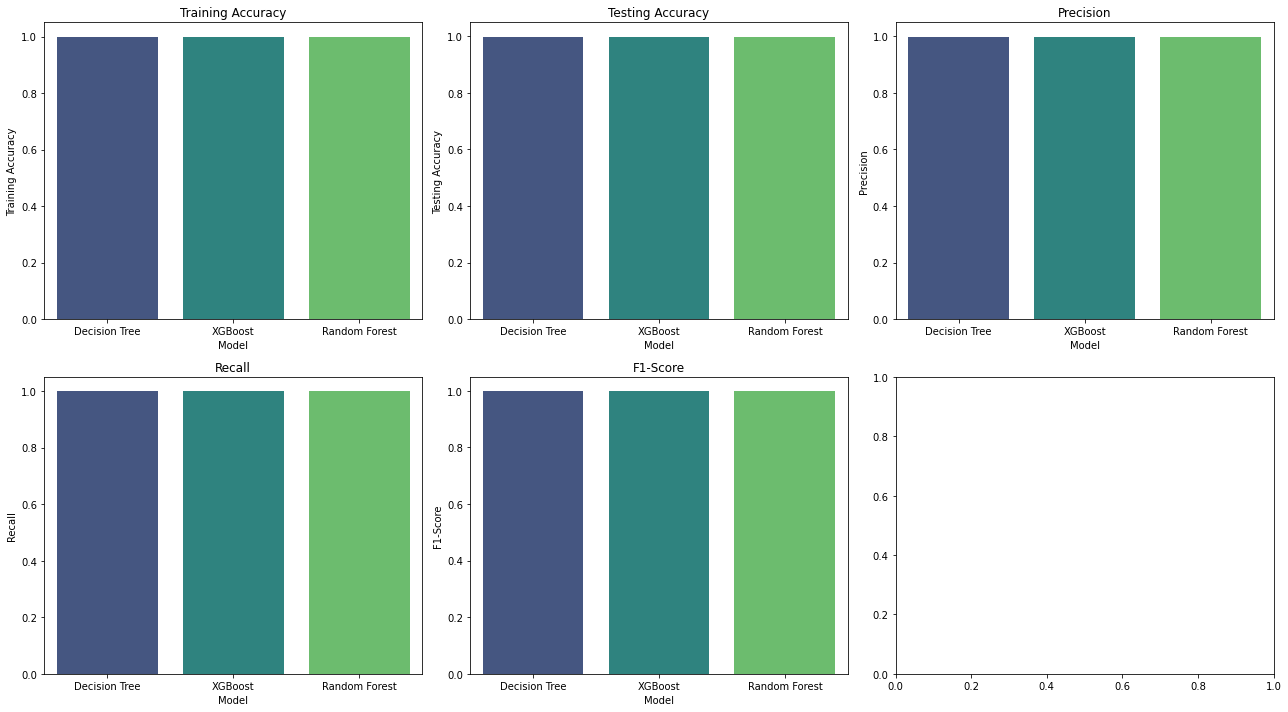

           Model  Training Accuracy  Testing Accuracy  Precision    Recall  \
0  Decision Tree                1.0            0.9991   0.998301  0.999078   
1        XGBoost                1.0            0.9994   0.998593  0.999711   
2  Random Forest                1.0            0.9994   0.998593  0.999711   

   F1-Score  
0  0.998689  
1  0.999151  
2  0.999151  


In [52]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `model`, `xgb_model`, and `rf_model` are your trained models
models = {
    "Decision Tree": model,       # Replace `model` with the actual decision tree model variable
    "XGBoost": xgb_model,         # Replace `xgb_model` with the actual XGBoost model variable
    "Random Forest": rf_model     # Replace `rf_model` with the actual random forest model variable
}

# Initialize results dictionary
results = {
    "Model": [],
    "Training Accuracy": [],
    "Testing Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Calculate and store metrics
for model_name, model in models.items():
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Classification report for precision, recall, and F1-score
    report = classification_report(y_test, y_pred_test, output_dict=True)
    precision = np.mean([report[str(i)]['precision'] for i in np.unique(y)])  # Adjust for class range
    recall = np.mean([report[str(i)]['recall'] for i in np.unique(y)])        # Adjust for class range
    f1_score = np.mean([report[str(i)]['f1-score'] for i in np.unique(y)])    # Adjust for class range
    
    # Storing results
    results["Model"].append(model_name)
    results["Training Accuracy"].append(train_accuracy)
    results["Testing Accuracy"].append(test_accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1_score)
    
    # Display Confusion Matrix and Report if needed
    print(f"\n{model_name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_test))
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred_test))
    print(f"{model_name} Training Accuracy: {train_accuracy}")
    print(f"{model_name} Testing Accuracy: {test_accuracy}")

# Convert results to DataFrame for easy visualization
df_results = pd.DataFrame(results)

# Plotting Evaluation Metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Bar plot for Accuracy, Precision, Recall, and F1-Score
sns.barplot(x='Model', y='Training Accuracy', data=df_results, ax=axes[0, 0], palette="viridis")
axes[0, 0].set_title("Training Accuracy")

sns.barplot(x='Model', y='Testing Accuracy', data=df_results, ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title("Testing Accuracy")

sns.barplot(x='Model', y='Precision', data=df_results, ax=axes[0, 2], palette="viridis")
axes[0, 2].set_title("Precision")

sns.barplot(x='Model', y='Recall', data=df_results, ax=axes[1, 0], palette="viridis")
axes[1, 0].set_title("Recall")

sns.barplot(x='Model', y='F1-Score', data=df_results, ax=axes[1, 1], palette="viridis")
axes[1, 1].set_title("F1-Score")

# Optional: Uncomment to plot the confusion matrix for the last model in the list
# cm = confusion_matrix(y_test, y_pred_test)
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[1, 2])
# axes[1, 2].set_title(f"Confusion Matrix for {model_name}")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Display the results table
print(df_results)


In [54]:
df_results

,Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1-Score
0,Decision Tree,1.0,0.9991,0.998301,0.999078,0.998689
1,XGBoost,1.0,0.9994,0.998593,0.999711,0.999151
2,Random Forest,1.0,0.9994,0.998593,0.999711,0.999151
